In [26]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


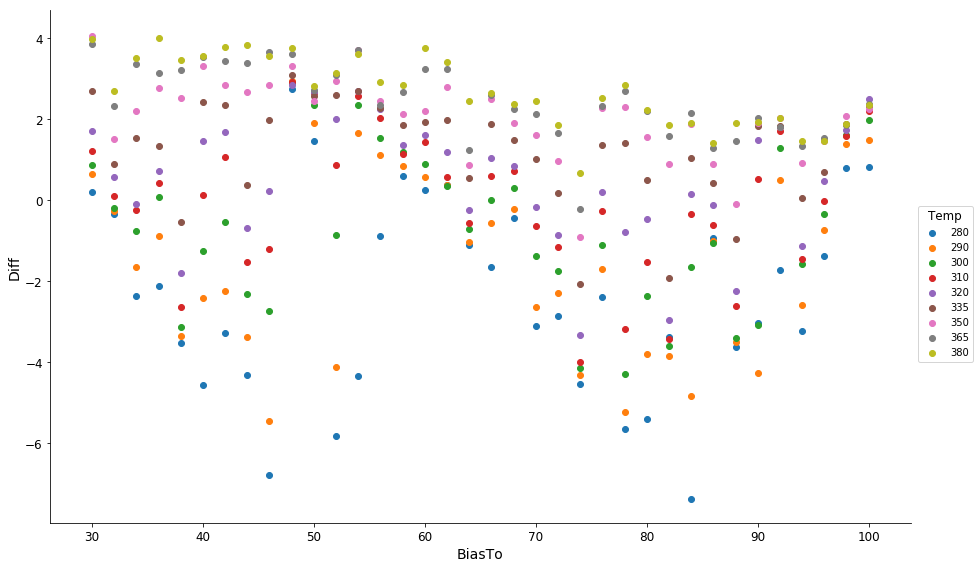

In [31]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/twelve/force_0.02_rg_0.1_lipid_0.5_mem_1_go_0.8/rerun_0_01_May_025941.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun0 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

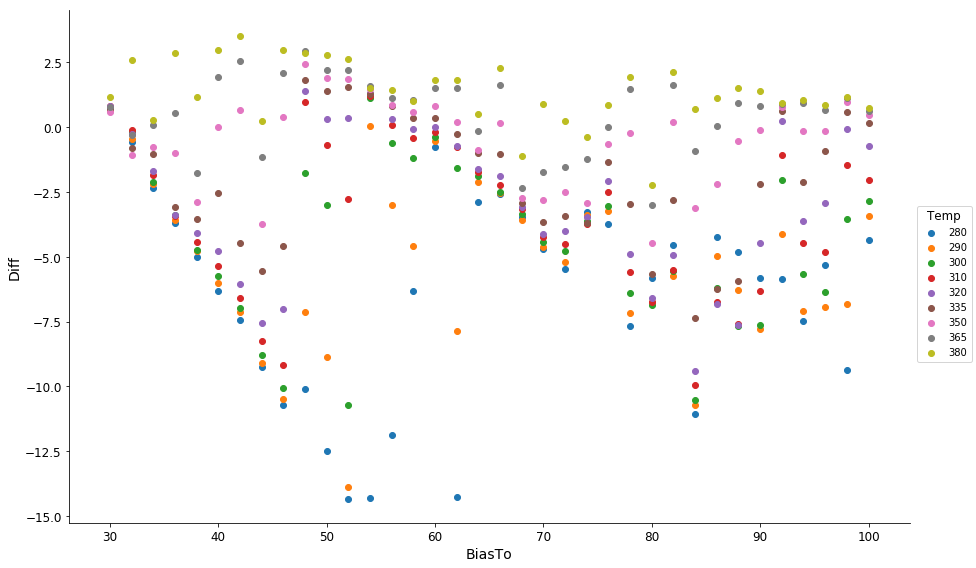

In [27]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/twelve/force_0.02_rg_0.1_lipid_0.5_mem_1_go_0.8/rerun_1_27_Apr_215043.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun1 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

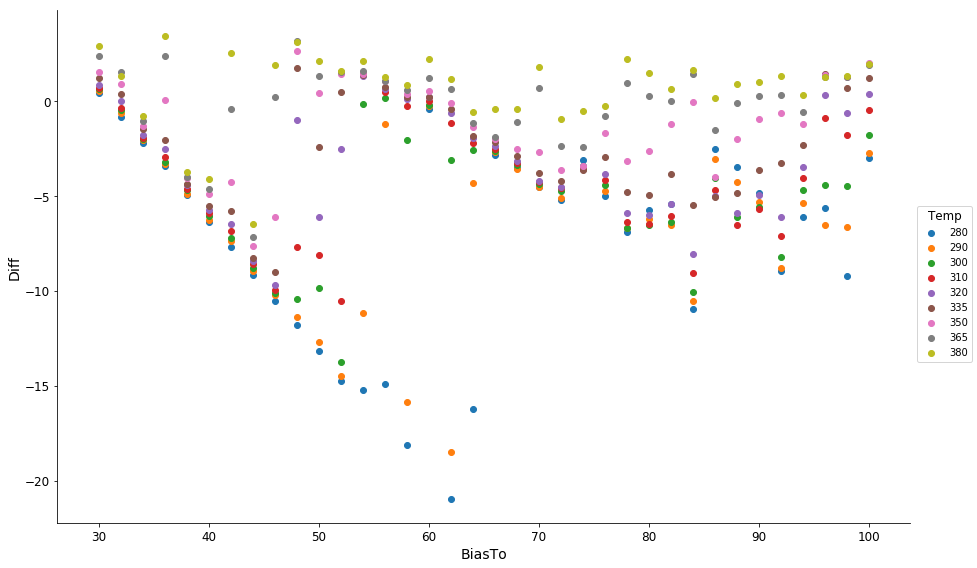

In [35]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/twelve/force_0.02_rg_0.1_lipid_0.5_mem_1_go_0.8/rerun_2_01_May_025941.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun2 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

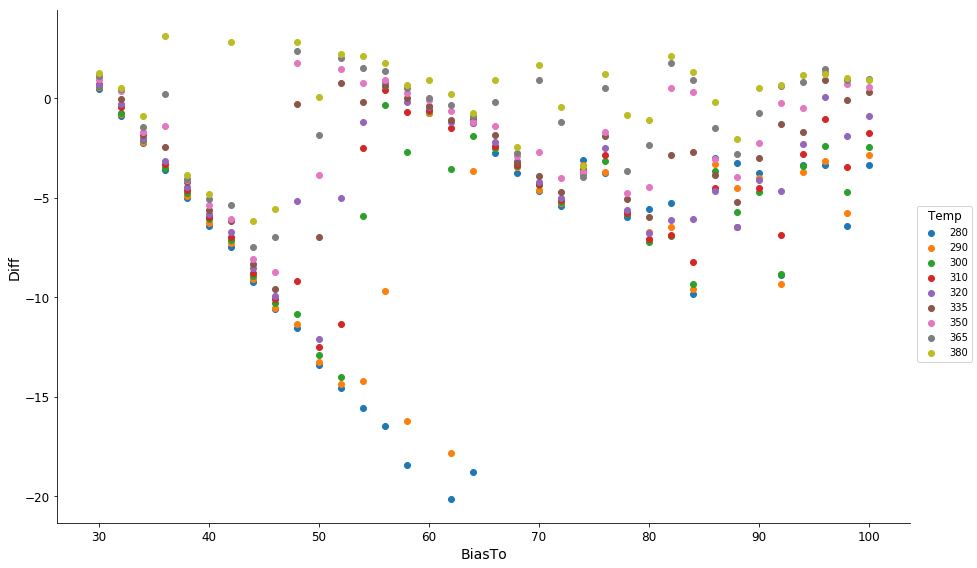

In [33]:
data = pd.read_feather("/Users/weilu/Research/server/apr_2018/twelve/force_0.02_rg_0.1_lipid_0.5_mem_1_go_0.8/rerun_3_01_May_025941.feather")
dic = {"T0":280, "T1":290, "T2":300, "T3":310, "T4":320, "T5":335, "T6":350, "T7":365, "T8":380, "T9":410, "T10":440, "T11":470}
a = data
a["Temp"] = a["Temp"].apply(lambda x: dic[x])
rerun3 = data
t = a.query("Temp < 400").groupby(["BiasTo","Temp"])[["DisReal","Run"]].mean().reset_index()
t["Diff"] = t["DisReal"]-t["BiasTo"].apply(pd.to_numeric)
t["BiasTo"] = t["BiasTo"].apply(pd.to_numeric)
fg = sns.FacetGrid(data=t, hue='Temp', size=8, aspect=1.61)
fg.map(plt.scatter, 'BiasTo', 'Diff').add_legend()

In [32]:
rerun0.query("Temp == 410 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

TypeError: Empty 'DataFrame': no numeric data to plot

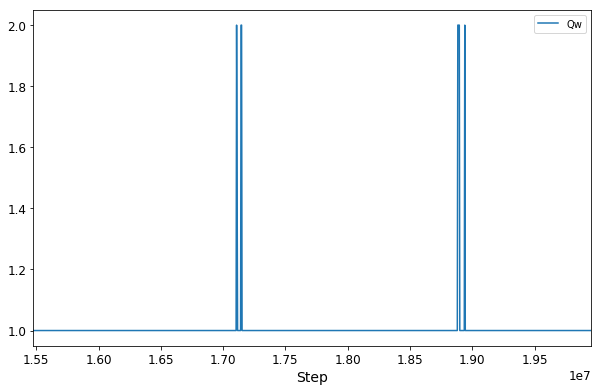

In [30]:
rerun1.query("Temp == 410 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

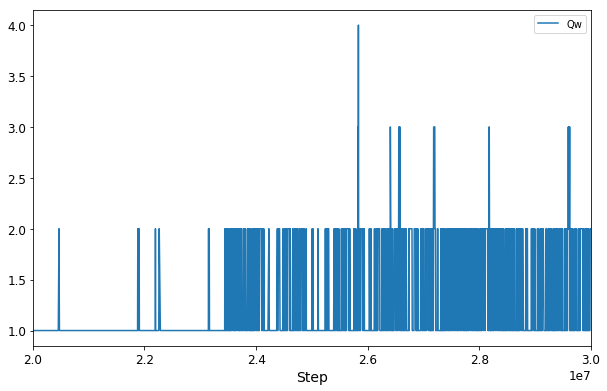

In [36]:
rerun2.query("Temp == 410 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

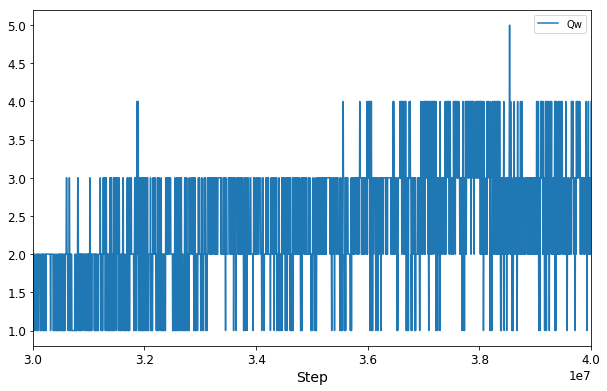

In [34]:
rerun3.query("Temp == 410 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

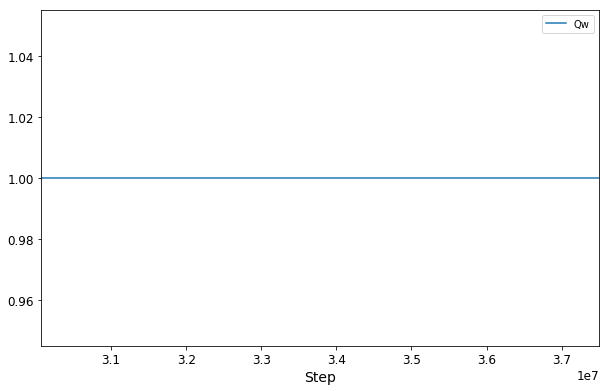

In [37]:
rerun3.query("Temp == 470 and Qw > 0.45").groupby("Step")["Qw"].count().reset_index().plot("Step", "Qw")

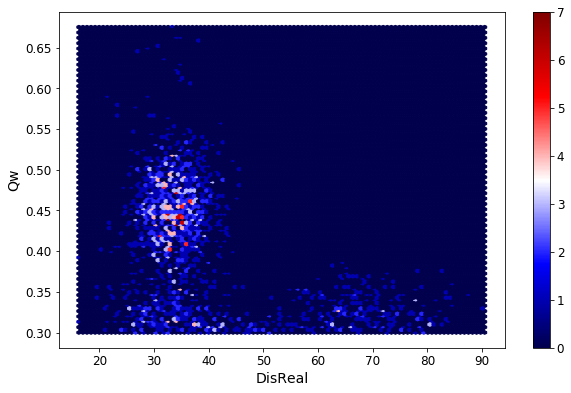

In [29]:
rerun1.query("Temp == 410 and Qw > 0.3").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

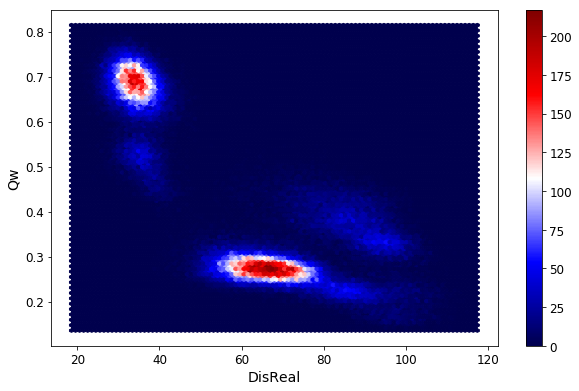

In [57]:
rerun3.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

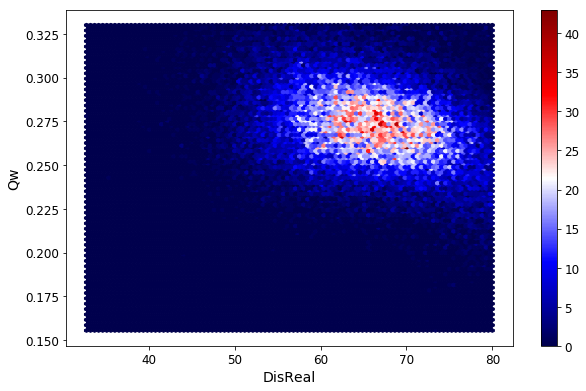

In [58]:
rerun3.query("Temp == 300 and Qw < 0.33 and DisReal < 80").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

In [59]:
t = rerun3.query("Temp == 300 and Qw < 0.33 and DisReal < 80")
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 300")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
54.0   9    321.0  55.609532  4.368647  38.940268  52.410744  55.998107   
56.0   2    416.0  56.398919  4.580072  42.366799  53.507801  56.314688   
       7    439.0  57.319567  4.399934  40.192677  54.499575  57.580332   
       8    375.0  56.670165  4.636787  35.474628  53.333859  56.825244   
58.0   0    381.0  57.703302  4.574761  45.324787  54.629510  57.816423   
       4    449.0  55.792468  6.304172  39.425367  51.502447  56.327778   
       6    338.0  58.110274  4.647568  44.991476  54.810290  58.161794   
       11   382.0  58.383531  4.535408  43.364665  55.688487  58.575513   
60.0   1    351.0  58.989125  4.570026  44.971859  55.452325  59.006528   
       2    325.0  59.313462  4.760364  42.618521  56.333766  59.568966   
       4    433.0  59.847708  4.130921  47.575543  57.251158  59.830235   
       6    372.0  58.989798  4.498839  43.751593  56.296126  59.217275   
       10   334.0  59.846566  4.294560  48.880700  56.835304  60.183060   
62.0   0    352.0  61.068625  4.672283  47.860711  58.079220  60.720150   
       1    327.0  61.016549  4.278745  48.849924  58.283119  60.796262   
       5    417.0  61.151903  4.458575  49.325087  58.078218  61.246776   
       6    326.0  61.056868  4.364853  49.635589  57.981446  60.880921   
64.0   0    345.0  62.015613  4.240573  51.512040  59.349600  62.203531   
       1    324.0  62.354792  4.586693  44.191145  59.095329  62.717842   
       2    369.0  61.856993  4.002707  51.069388  59.509032  62.154285   
       7    354.0  62.157223  4.295324  47.748596  59.212288  62.124281   
66.0   1    371.0  63.230383  4.380755  48.594718  60.369544  63.362788   
       2    308.0  63.292475  4.400642  50.542268  60.584161  63.296398   
       5    334.0  63.751778  4.545359  51.689988  60.722049  63.936426   
       6    359.0  63.359985  3.992054  49.015707  60.552658  63.328822   
       7    321.0  63.027917  4.455500  51.708824  60.035243  62.815664   
       9    309.0  63.913690  4.476331  48.609211  61.158125  64.173397   
68.0   7    325.0  64.781359  4.297152  52.844976  61.905827  65.072144   
       8    388.0  64.607339  4.090759  50.618519  61.936447  64.752276   
       10   333.0  64.291550  4.131974  51.102245  61.529665  64.537021   
...           ...        ...       ...        ...        ...        ...   
70.0   8    390.0  65.362608  4.078329  53.220158  62.812089  65.288247   
       10   463.0  65.494745  4.138627  53.698802  62.696853  65.374921   
72.0   1    306.0  66.749768  4.129399  53.959970  64.178174  66.761768   
       2    309.0  67.101246  3.756118  56.454732  64.331687  67.276728   
       5    378.0  66.690291  4.190097  53.134214  64.423030  66.689972   
       8    382.0  66.641034  3.958673  55.038239  64.064010  66.745427   
74.0   5    318.0  68.116895  3.971104  54.257423  65.552772  68.126690   
76.0   4    358.0  69.486426  3.935444  58.384469  66.636096  69.481535   
       6    328.0  69.389189  3.936033  55.560262  66.961892  69.400855   
       10   412.0  69.237773  3.810899  53.220824  66.698502  69.315296   
78.0   2    303.0  70.074652  4.044854  60.176055  67.352704  70.077618   
       4    310.0  69.712492  3.935628  56.719741  66.986083  70.185170   
       8    362.0  70.496312  3.838739  59.444951  67.866865  70.443461   
       9    347.0  69.858195  4.104885  58.992714  67.175231  69.851607   
80.0   3    455.0  70.787766  3.832940  58.930611  67.814187  70.793136   
       4    390.0  70.749116  3.956784  57.252132  68.146179  70.887153   
       5    330.0  71.489499  3.749602  59.841100  69.335543  71.648134   
       6    390.0  71.352831  3.861309  60.480874  68.873472  71.661885   
82.0   7    437.0  73.059149  3.873909  60.879104  70.369966  73.307655   
       8    376.0  72.991434  3.841731  60.559852  70.297639  73.198884   
       9    498.0  72.263809  3.83178

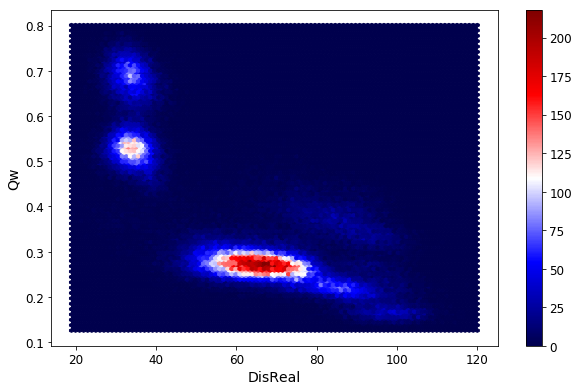

In [3]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

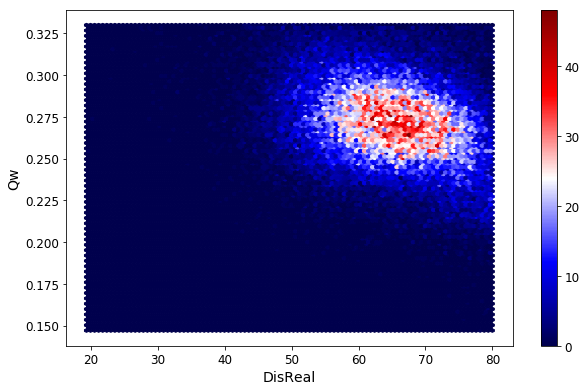

In [5]:
rerun1.query("Temp == 300 and Qw < 0.33 and DisReal < 80").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

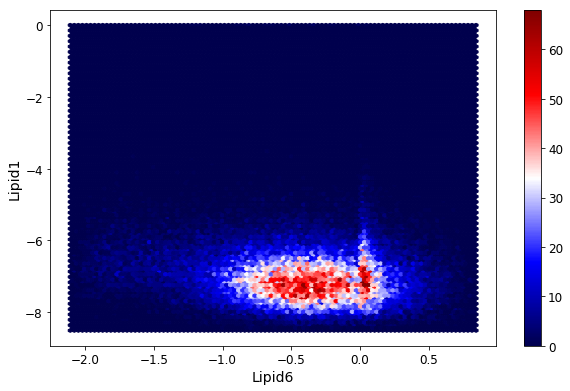

In [8]:
rerun1.query("Temp == 300 and Qw < 0.33 and DisReal < 80").plot.hexbin("Lipid6", "Lipid1", cmap="seismic", sharex=False)

In [11]:
t = rerun1.query("Temp == 300 and Qw < 0.33 and DisReal < 80")
t.groupby(["BiasTo", "Run"])["DisReal"].describe().query("count > 300")

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
48.0   10   386.0  50.349961  5.172397  36.310372  47.046215  50.570074   
50.0   3    507.0  52.464905  4.826395  34.195744  49.389336  52.468052   
       7    433.0  51.865832  4.570383  35.999084  48.501295  51.610424   
54.0   9    405.0  55.591624  4.825440  41.084091  52.257899  55.728241   
       11   424.0  55.899278  4.495658  40.948843  52.513443  55.937170   
56.0   2    425.0  56.824749  4.442692  44.148995  53.779036  57.049983   
       4    343.0  56.565824  4.726212  45.563690  53.383555  56.423129   
       7    303.0  57.007332  4.848640  43.673075  53.723613  56.887736   
       8    328.0  57.112806  4.432104  44.383334  53.934231  56.968738   
       9    474.0  56.719263  4.424913  44.966168  53.677215  56.696666   
58.0   0    316.0  57.598513  4.709305  40.136259  54.005366  58.064425   
       2    558.0  58.261211  4.370479  43.138478  55.695732  58.443520   
       8    361.0  55.834508  6.135967  37.290488  51.947798  56.609309   
       11   433.0  57.879335  4.385939  42.785878  54.982112  57.944199   
60.0   1    453.0  59.485709  4.503133  45.569861  56.552579  59.234439   
       7    434.0  60.027246  4.481930  46.574558  56.848872  60.199163   
       10   519.0  59.398593  4.322628  42.556277  56.689272  59.615466   
       11   391.0  59.301992  4.627003  46.375800  56.270742  59.378775   
62.0   3    412.0  61.033590  4.407907  48.599105  58.125885  60.873236   
       5    344.0  60.946401  4.373208  46.832647  58.267256  61.224659   
       8    380.0  60.843327  4.452904  47.873822  58.230446  60.801741   
       9    351.0  60.795959  4.698969  47.609656  57.983177  60.780764   
64.0   1    424.0  62.306035  4.490952  50.360029  59.385870  62.127334   
       6    411.0  62.295929  4.062271  49.657256  59.905365  62.115365   
       9    367.0  62.030062  4.260128  50.411677  59.560359  61.941652   
66.0   2    390.0  64.214225  4.471624  53.026092  61.349062  64.127269   
       3    363.0  63.827573  4.348244  51.539569  60.899296  64.112860   
       6    430.0  63.274270  4.153892  50.278971  60.501918  63.448719   
       9    467.0  63.227000  4.524872  49.126490  60.310858  63.317222   
       10   467.0  63.320190  4.206340  51.706448  60.752748  63.389291   
...           ...        ...       ...        ...        ...        ...   
72.0   1    308.0  67.105596  3.988249  56.072676  64.518065  67.375670   
       5    396.0  66.737392  4.054141  53.525067  64.114736  66.994003   
       6    396.0  66.745762  4.073717  53.577162  64.389394  66.752070   
       11   355.0  67.054092  3.940224  54.912721  64.155054  67.183713   
74.0   2    301.0  68.204817  3.962156  55.829562  65.625379  68.221858   
       8    411.0  68.363125  4.169125  56.075861  65.656876  68.182977   
       11   326.0  67.579947  4.053612  57.130135  64.565261  67.696924   
76.0   7    358.0  68.781488  4.096660  54.608736  66.355319  68.931705   
       11   426.0  68.766794  3.984070  55.831264  65.892502  68.750538   
78.0   1    351.0  69.622144  4.075867  58.976733  66.778689  69.710970   
       4    384.0  70.428799  4.142322  57.418675  67.627569  70.444487   
       8    483.0  70.184181  3.894328  56.562572  67.534485  70.069279   
       9    398.0  70.385278  3.877417  59.145722  67.487369  70.293185   
80.0   3    450.0  71.103704  3.997840  59.092794  68.187268  71.138455   
       4    323.0  70.937934  3.735063  59.999225  68.389160  70.853948   
       5    401.0  71.280302  3.731541  57.293351  68.886310  71.226378   
       7    363.0  70.819407  4.023257  58.089475  68.232618  70.742925   
82.0   7    530.0  72.472299  3.583265  61.375541  69.969362  72.637772   
       9    417.0  72.572387  3.489375  61.230097  70.276459  72.691883   
84.0   0    353.0  72.941866  3.851974  61.411706  70.265705  73.396166   
       6    384.0  72.728958  3.73835

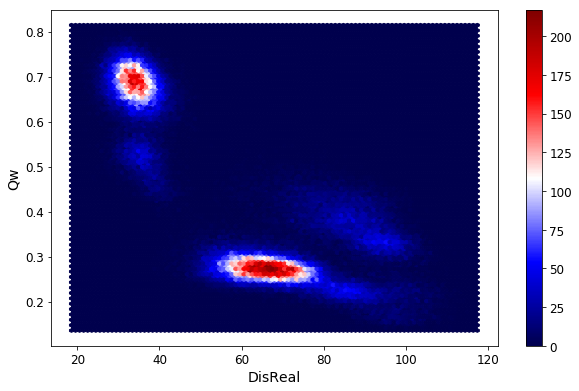

In [48]:
rerun3.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

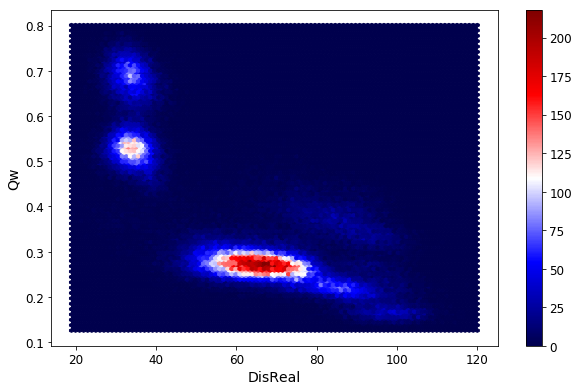

In [49]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "Qw", cmap="seismic", sharex=False)

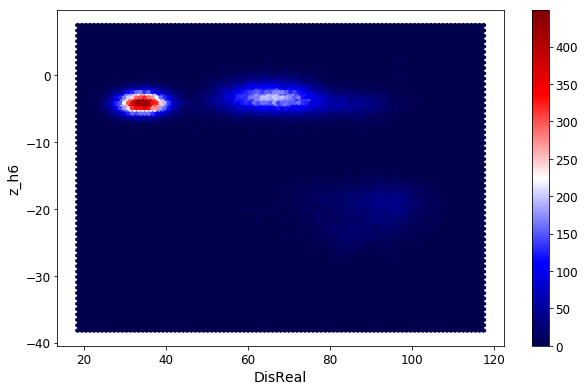

In [14]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

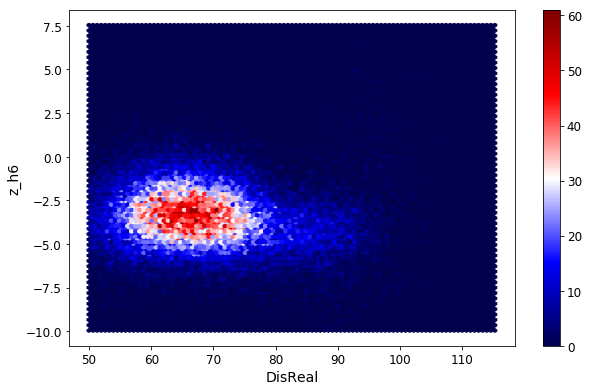

In [16]:
rerun1.query("Temp == 300 and DisReal > 50 and z_h6 > -10").plot.hexbin("DisReal", "z_h6", cmap="seismic", sharex=False)

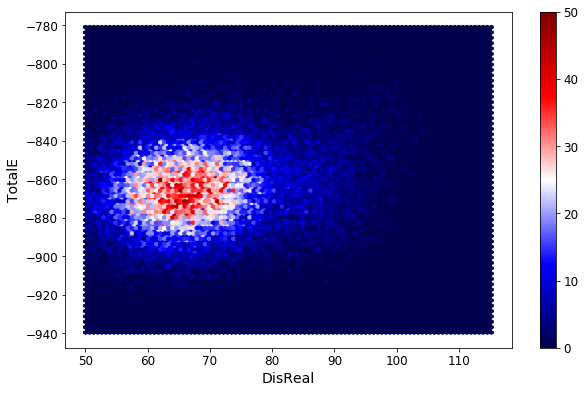

In [29]:
rerun1.query("Temp == 300 and DisReal > 50 and z_h6 > -10").plot.hexbin("DisReal", "TotalE", cmap="seismic", sharex=False)

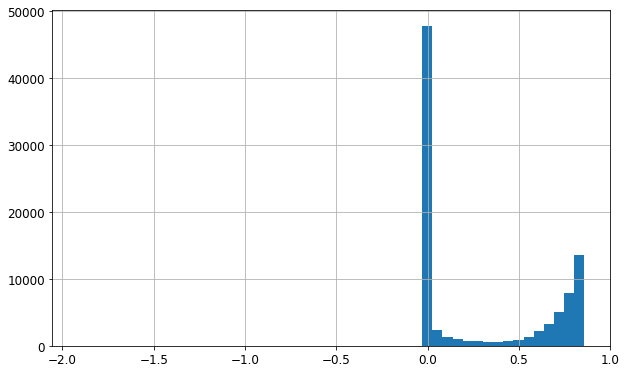

In [36]:
rerun1.query("Temp == 300")["Lipid4"].hist(bins=50)

In [ ]:
rerun1.query("Temp == 300")["Lipid4"].hist(bins=50)

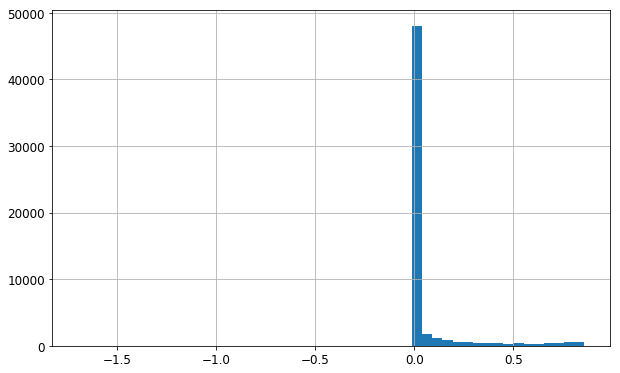

In [33]:
rerun1.query("Temp == 300 and DisReal >50")["Lipid4"].hist(bins=50)

In [35]:
t["Lipid4"].max()

0.85846204409374294

In [37]:
t.min()

Step             3.000400e+07
Run              0.000000e+00
Temp             3.000000e+02
Qw               1.370902e-01
Energy          -9.278468e+02
DisReal          5.000483e+01
Dis_h56          6.710499e+00
z_average       -1.187149e+01
abs_z_average    8.305289e+00
z_h1            -7.983797e+00
z_h2            -1.203628e+01
z_h3            -3.692447e+01
z_h4            -3.807466e+01
z_h5            -1.531464e+01
z_h6            -9.960542e+00
Distance        -3.117980e+01
AMH-Go          -4.841644e+02
Membrane        -4.470640e+01
Rg               2.709757e+00
rg1              5.378946e-01
rg2              4.601441e-01
rg3              2.074243e-06
rg4              7.900925e-08
rg5              3.985535e-01
rg6              4.499740e-01
rg_all           2.709757e+00
Lipid           -1.669554e+01
Lipid1          -8.508448e+00
Lipid2          -2.143902e+00
Lipid3          -1.469574e+00
Lipid4          -1.703276e+00
Lipid5           1.744623e-03
Lipid6          -2.102832e+00
Lipid7    

In [30]:
t.mean()

Step             3.492012e+07
Run              5.722035e+00
Temp             3.000000e+02
Qw               2.791516e-01
Energy          -8.529150e+02
DisReal          6.898342e+01
Dis_h56          2.441343e+01
z_average       -2.226738e+00
abs_z_average    1.039043e+01
z_h1            -1.734524e+00
z_h2            -6.574426e+00
z_h3            -7.348944e+00
z_h4            -8.360311e+00
z_h5            -4.690087e+00
z_h6            -3.456860e+00
Distance         6.291615e+01
AMH-Go          -4.277923e+02
Membrane        -3.800192e+01
Rg               7.370153e+00
rg1              8.948035e-01
rg2              1.059860e+00
rg3              1.762143e+00
rg4              1.262527e+00
rg5              9.144830e-01
rg6              1.476337e+00
rg_all           7.370153e+00
Lipid           -1.165119e+01
Lipid1          -6.423660e+00
Lipid2          -1.035618e+00
Lipid3           2.024773e-02
Lipid4           4.266674e-02
Lipid5           3.464634e-03
Lipid6          -4.149927e-01
Lipid7    

In [26]:
def select(t, i=100):
    return t.groupby(["BiasTo", "Run"])["DisReal"].describe().query(f"count > {i}")

In [27]:
t = rerun1.query("Temp == 300 and DisReal > 50 and z_h6 > -10")
b = select(t,300)

In [28]:
b

count       mean       std        min        25%        50%  \
BiasTo Run                                                                
54.0   9    315.0  56.497022  3.626845  50.030841  53.772347  56.516503   
56.0   2    380.0  57.230019  3.858434  50.010446  54.298710  56.884262   
       7    478.0  57.637799  3.913047  50.037686  54.726826  57.620867   
       8    356.0  57.198967  4.115024  50.039683  53.971660  57.058132   
58.0   0    368.0  58.111254  4.175623  50.047456  55.083698  57.994409   
       4    368.0  57.918478  4.686929  50.095536  54.525873  57.503970   
       6    333.0  58.387850  4.322981  50.004829  55.075531  58.229031   
       11   377.0  58.707428  4.047791  50.034044  56.124062  58.676417   
60.0   1    344.0  59.230079  4.318804  50.124625  55.821415  59.314297   
       2    316.0  59.719799  4.283054  50.021556  56.964954  59.823460   
       4    430.0  59.969640  3.968517  50.054836  57.325776  59.868658   
       6    370.0  59.265528  4.119872  50.099968  56.643213  59.279874   
       10   332.0  59.941543  4.170192  50.096730  56.957436  60.188117   
62.0   0    364.0  61.000488  4.603946  50.094185  57.969802  60.621367   
       1    327.0  61.047905  4.226562  50.814615  58.345636  60.796262   
       5    415.0  61.208498  4.393796  50.172183  58.134588  61.397876   
       6    361.0  60.806899  4.408753  50.383843  57.773867  60.796132   
64.0   0    349.0  61.949173  4.267800  51.512040  59.288620  62.125452   
       1    333.0  62.325047  4.499096  50.141872  59.060544  62.663201   
       2    400.0  61.842861  4.060724  51.069388  59.497596  62.232979   
       7    359.0  62.177457  4.292459  52.425857  59.163549  62.100260   
66.0   1    372.0  63.267848  4.291060  51.032984  60.371308  63.395511   
       2    312.0  63.330755  4.496194  50.542268  60.584161  63.290539   
       5    335.0  63.727993  4.559381  51.689988  60.585168  63.917248   
       6    358.0  63.400053  3.924687  53.249591  60.566652  63.359353   
       7    322.0  63.013032  4.456566  51.708824  60.004718  62.798396   
       9    309.0  63.964340  4.356261  50.175598  61.158125  64.173397   
68.0   7    326.0  64.774976  4.292083  52.844976  61.932320  65.034896   
       8    391.0  64.571668  4.105989  50.618519  61.877602  64.690915   
       10   333.0  64.291550  4.131974  51.102245  61.529665  64.537021   
...           ...        ...       ...        ...        ...        ...   
78.0   4    315.0  69.804616  4.066021  56.719741  67.002305  70.200905   
       8    375.0  70.550822  3.862257  59.444951  67.899966  70.532088   
       9    348.0  69.888341  4.137365  58.992714  67.179596  69.853020   
80.0   1    360.0  79.084215  5.346536  65.499362  75.326782  79.269878   
       3    459.0  70.878083  3.937007  58.930611  67.853229  70.832491   
       4    392.0  70.803125  4.018252  57.252132  68.154833  70.892567   
       5    337.0  71.697741  3.979840  59.841100  69.387700  71.787929   
       6    410.0  71.335394  4.012043  58.654694  68.835172  71.631064   
82.0   7    447.0  73.567878  4.524396  60.879104  70.384324  73.434358   
       8    431.0  74.120203  4.766199  60.559852  70.762720  73.906738   
       9    517.0  72.439729  4.005941  59.845934  69.720882  72.506503   
       10   363.0  80.950712  5.202243  67.004589  77.104817  81.206439   
       11   518.0  73.253183  4.930418  60.007782  70.293246  72.807577   
84.0   6    471.0  72.934963  4.148645  61.936795  70.174066  73.062498   
       7    487.0  72.889845  3.881517  61.077870  70.235767  73.184701   
       8    564.0  73.079357  3.998019  60.440987  70.424787  72.957331   
       11   451.0  73.345057  3.837879  62.276898  70.662739  73.287462   
86.0   2    452.0  74.054148  4.123051  63.895237  71.160919  73.822281   
       4    430.0  84.170519  5.331678  67.300648  80.708517  84.492920   
       6    461.0  84.593250  5.136181  69.999454  81.501125  84.507493   
88.0   0    382.0  76.127436  4.10766

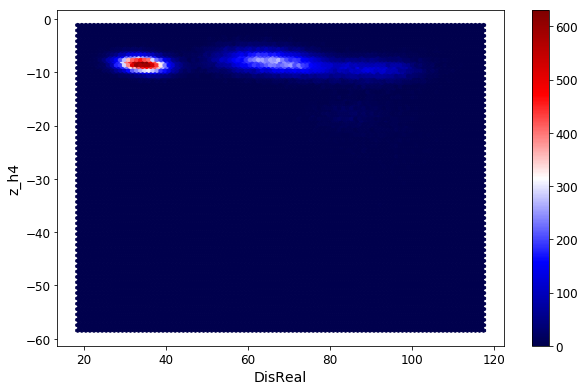

In [19]:
rerun1.query("Temp == 300").plot.hexbin("DisReal", "z_h4", cmap="seismic", sharex=False)

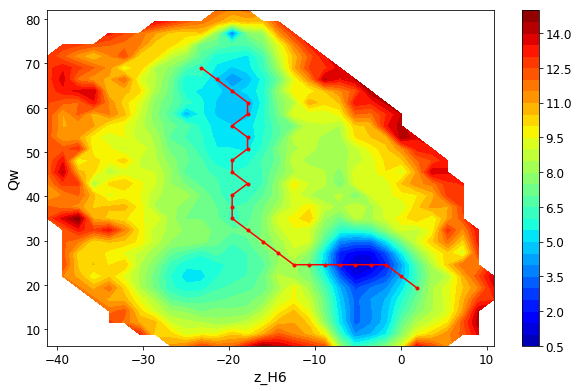

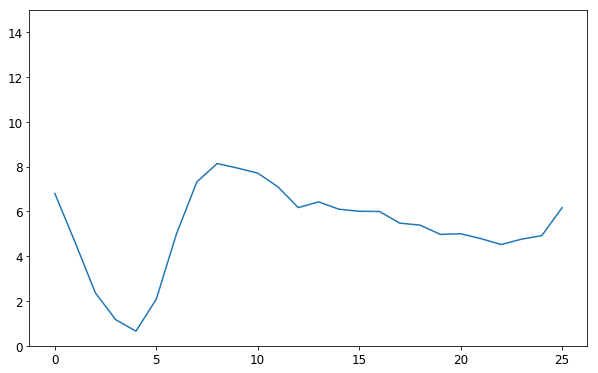

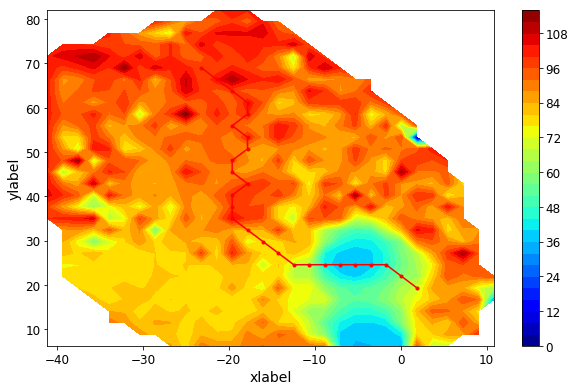

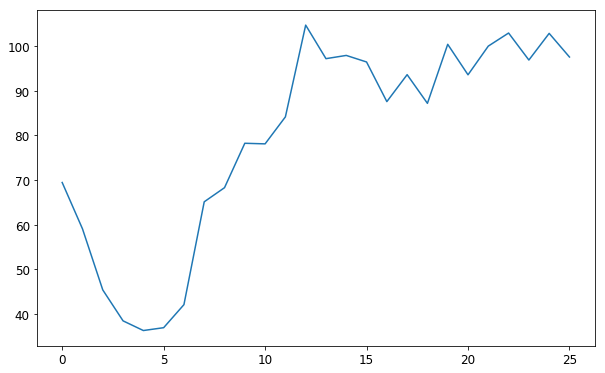

In [20]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 340
location = pre + "/twelve/_280-350/2d_z_h56/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(24, 10), end=(5,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=15)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

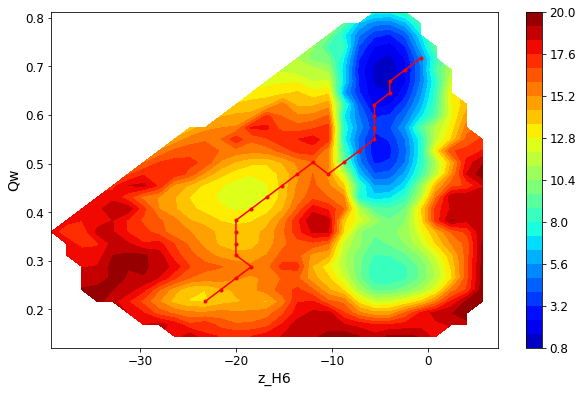

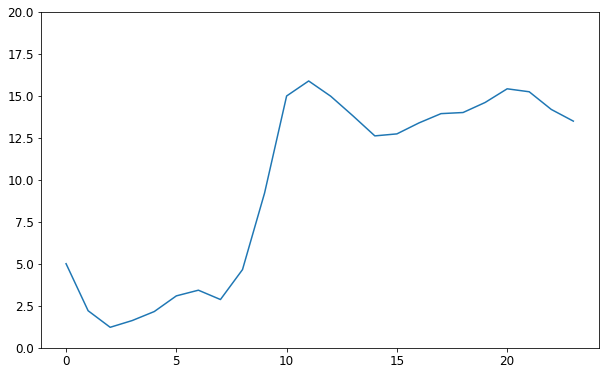

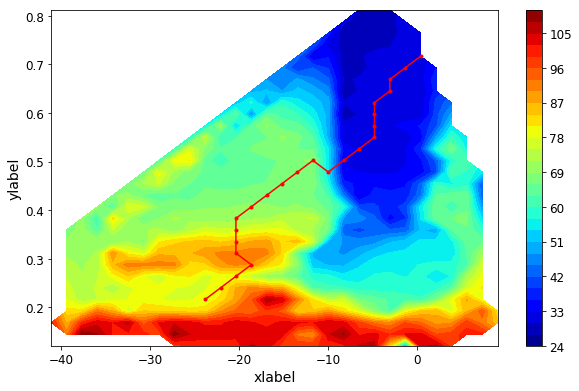

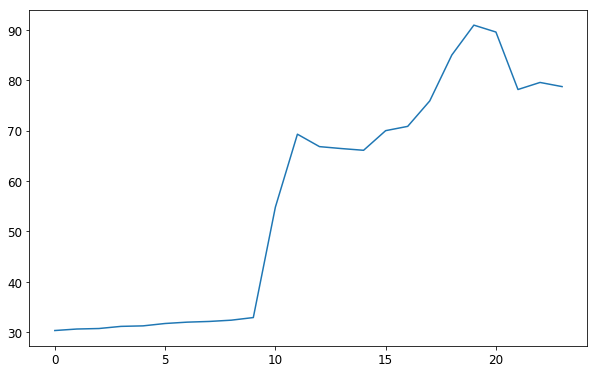

In [38]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 300
location = pre + "/twelve/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 10), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=20)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

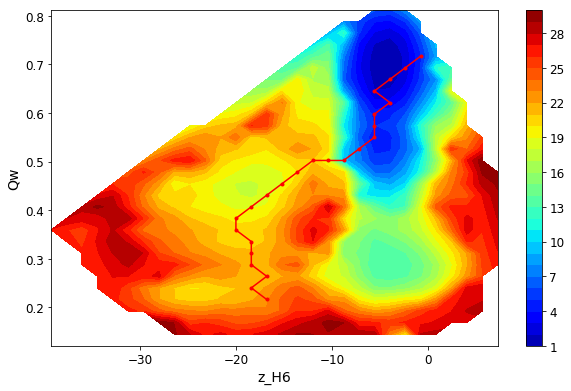

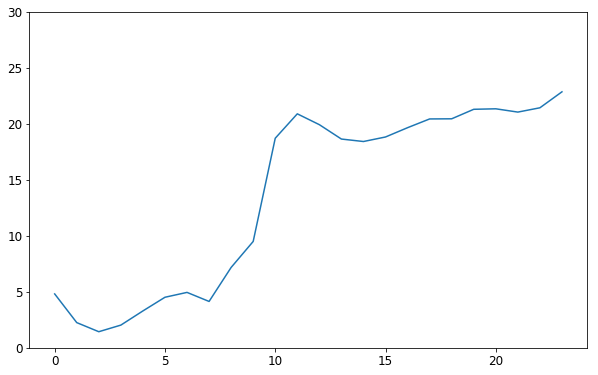

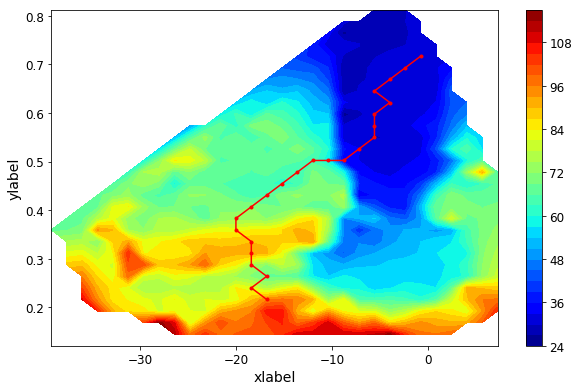

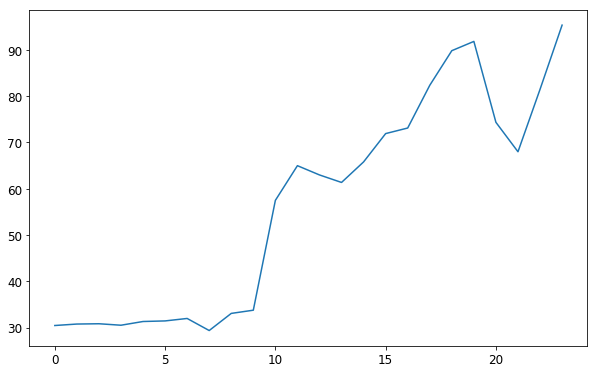

In [44]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 280
location = pre + "/twelve/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

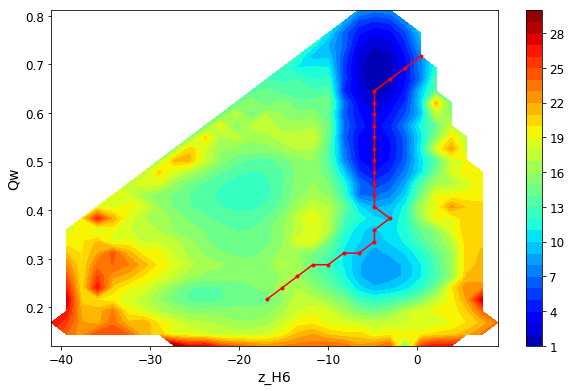

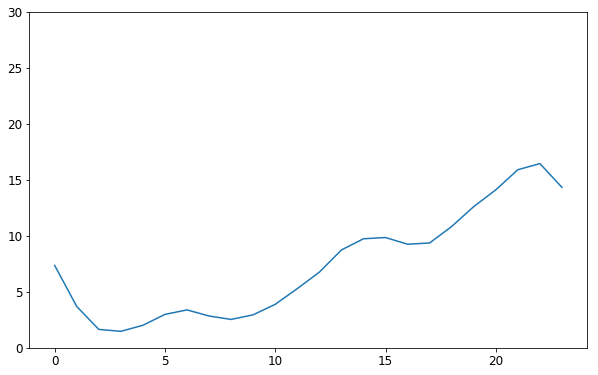

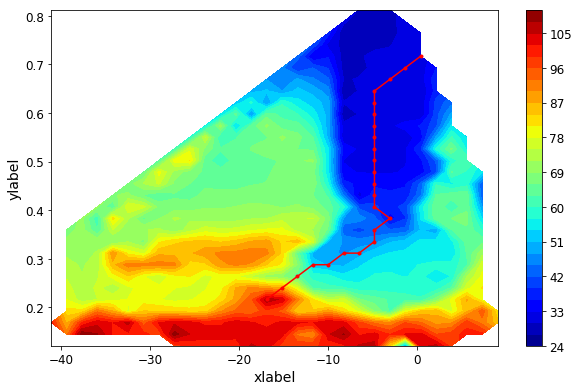

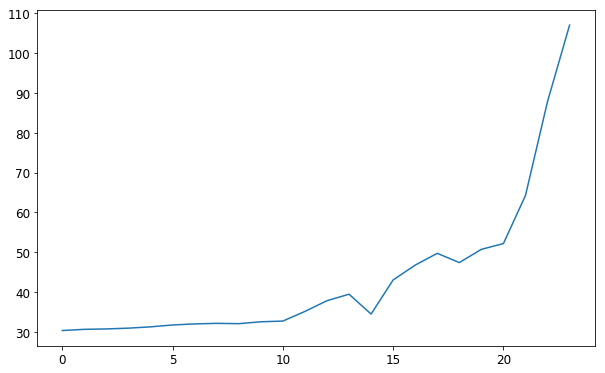

In [50]:
pre = "/Users/weilu/Research/server/apr_2018/04_week"
temp = 300
location = pre + "/twelve/_280-350/2d_z_qw/force_0.0/"
location2 = location + f"pmf-{temp}.dat"
path, f = shortest_path(location2, start=(4, 14), end=(25,24), save=False, xlabel="z_H6", ylabel="Qw", zmax=30)
# plt.savefig("/Users/weilu/papers/figures/2d_z6_qw.png", dpi=300)
# plt.savefig("/Users/weilu/papers/figures/shortest_path.png", dpi=300)
location2 = location + f"evpb-{temp}.dat"
(xi,yi,zi) = plot2d(location2, zmax=120)
plt.plot(xi[path[:,1]], yi[path[:,0]], 'r.-')
# plt.savefig("/Users/weilu/papers/figures/2d_expected_dis.png", dpi=300)
plt.figure()
f_on_path = [zi[tuple(p)] for p in reversed(path)]
plt.plot(f_on_path)
# plt.savefig("/Users/weilu/papers/figures/shortest_path_expected_dis.png", dpi=300)

In [56]:
b = rerun1.query("BiasTo == '92.0'").groupby(["Run", "Temp"])["Step"].count().reset_index()
c = b.pivot(index="Run", columns="Temp", values="Step").reset_index()
c

Temp,Run,280,290,300,310,320,335,350,365,380,410,440,470
0,0,84.0,212.0,360.0,474.0,406.0,201.0,111.0,95.0,117.0,169.0,163.0,108.0
1,1,22.0,48.0,150.0,182.0,202.0,315.0,345.0,355.0,359.0,98.0,210.0,214.0
2,2,826.0,706.0,496.0,283.0,101.0,57.0,23.0,8.0,NaN,NaN,NaN,NaN
3,3,2.0,13.0,85.0,133.0,213.0,369.0,461.0,349.0,293.0,289.0,199.0,94.0
4,4,8.0,26.0,64.0,104.0,130.0,149.0,153.0,229.0,245.0,498.0,460.0,434.0
5,5,4.0,22.0,90.0,113.0,201.0,262.0,254.0,260.0,256.0,356.0,344.0,338.0
6,6,18.0,82.0,180.0,227.0,309.0,285.0,295.0,328.0,330.0,156.0,104.0,186.0
7,7,886.0,755.0,453.0,250.0,118.0,32.0,6.0,NaN,NaN,NaN,NaN,NaN
8,8,NaN,4.0,36.0,104.0,226.0,300.0,378.0,421.0,423.0,322.0,224.0,62.0
9,9,NaN,4.0,36.0,86.0,170.0,198.0,160.0,128.0,172.0,383.0,537.0,626.0


In [53]:
r = (1000/300)**(1/11)

In [55]:
[round(300*r**i) for i in range(12)]

[300, 335, 373, 417, 465, 519, 579, 645, 720, 803, 896, 1000]